In [1]:
import cv2
import math
import numpy as np
import plotly.figure_factory as ff
import rasterio

from rasterio.plot import show
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, multivariate_normal
from scipy.ndimage import gaussian_filter
from PIL import Image



Variables iniciales

In [2]:
cmap = 'nipy_spectral'
pi=math.pi

Importación de las imagenes

In [3]:
with rasterio.open('./img/cropped/red.tif') as src:
    red=src.read(1)
with rasterio.open('./img/cropped/nir.tif') as src:
    nir = src.read(1)

with rasterio.open('./img/2. IMG_700101_000458_0092_NIR.TIF') as src:
    nir_field = src.read(1)

with rasterio.open('img/3. IMG_700101_000458_0092_RED.TIF') as src:
    red_field = src.read(1)


/opt/homebrew/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Normalización de las imagenes

In [4]:
red = red/65535.0
nir = nir/65535.0
red_field = red_field/65535.0
nir_field = nir_field/65535.0

ndvi =(nir.astype(float)-red.astype(float)/(nir+red))
ndvi_field =(nir_field.astype(float)-red_field.astype(float)/(nir_field+red_field))

Gráfica de una única curva

/var/folders/cr/d_063phd0572skkv1bwmdz6h0000gn/T/ipykernel_453/302415453.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable)


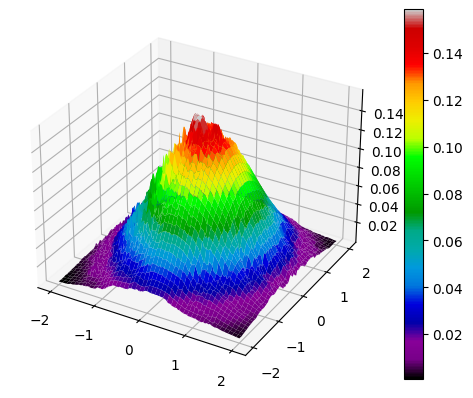

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the NDVI values
ndvi = (nir - red) / (nir + red)

# Define the parameters for the Gaussian bell function
x = 0 # center point
y = 0  # center point
sigma_xy = 1  # spread in the xy plane
sigma_z = 1  # spread in the z direction
Qm =1  # maximum value of the bell function

# Create a meshgrid for the x, y, and NDVI values
xf, yf = np.meshgrid(np.linspace(-2, 2, red.shape[1]), np.linspace(-2, 2, red.shape[0]))
ndvif = np.meshgrid(np.linspace(-1, 1, red.shape[1]), np.linspace(-1, 1, red.shape[0]))[0]

# Create the 3D Gaussian bell function based on the NDVI values
f = Qm / (2 * np.pi * sigma_xy ** 2 * sigma_z) * np.exp(-(xf - x) ** 2 / (2 * sigma_xy ** 2) - (yf - y) ** 2 / (2 * sigma_xy ** 2) - (ndvif - ndvi) ** 2 / (2 * sigma_z ** 2))

# Plot the 3D Gaussian bell function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mappable = plt.cm.ScalarMappable(cmap=cmap)
mappable.set_array(f)
cbar = plt.colorbar(mappable)
ax.plot_surface(xf, yf, f, cmap=cmap)
plt.show()


Gráfica de múltiples campanas

In [27]:
# Create a meshgrid for the x, y, and NDVI values
xf, yf = np.meshgrid(np.linspace(-10, 10, red.shape[1]), np.linspace(-10, 10, red.shape[0]))
ndvif = np.meshgrid(np.linspace(-1, 1, red.shape[1]), np.linspace(-1, 1, red.shape[0]))[0]

def calculate_ndvi(red, nir):
    #Calculate the NDVI values
    ndvi = (nir - red) / (nir + red)
    return(ndvi)

def gaussian_with_image(Qm, x, y, sigma_xy, sigma_z, ndvi, ndvif, xf, yf):
    # Create the 3D Gaussian bell function based on the NDVI values
    f = Qm / (2 * np.pi * sigma_xy ** 2 * sigma_z) * np.exp(-(xf - x) ** 2 / (2 * sigma_xy ** 2) - (yf - y) ** 2 / (2 * sigma_xy ** 2) - (ndvif - ndvi) ** 2 / (2 * sigma_z ** 2))
    #threshold = 1e-2
    #f[f < threshold] = np.nan
    return f

def plot_gaussian(f, xf, yf):
    # Plot the 3D Gaussian bell function
    ax.plot_surface(xf, yf, f, cmap=cmap)


### Image Cropping

In [7]:
def image_cropper(ndvi_field,x1,y1,x2,y2):
    """
    This function is used to crop the image
    """
    ndvi_mask = np.zeros(ndvi_field.shape, dtype=np.uint8)
    ndvi_mask[y1:y2, x1:x2] = 1

    # Apply the mask to the NDVI image
    ndvi_field = np.array(ndvi_field) * ndvi_mask

    # Create a RGB image from the NDVI image
    return ndvi_field
    # Convert the Numpy array to a PIL Image object
    #img = Image.fromarray(rgb_field)

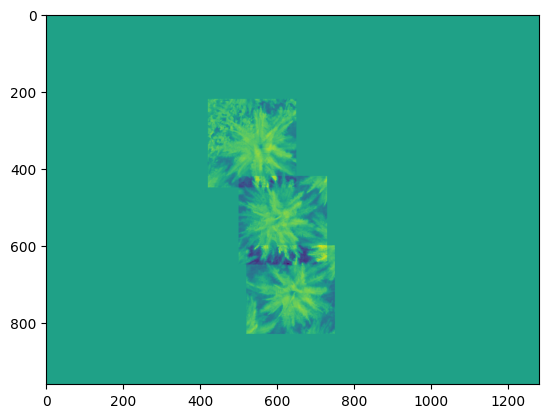

<Axes: >

In [8]:
ndvi1 = image_cropper(ndvi_field, 420, 220, 650, 450)
ndvi2 = image_cropper(ndvi_field, 500, 420, 730, 650)
ndvi3 = image_cropper(ndvi_field, 520, 600, 750, 830)
show(ndvi3+ndvi1+ndvi2)

## GRAFICADOR DE MÚLTIPLES GRAFICAS


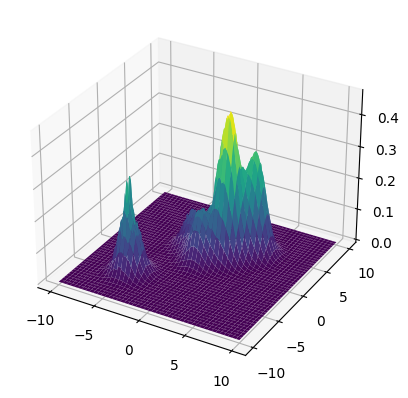

In [30]:
cmap = 'viridis'

ndvi = calculate_ndvi(red, nir)
f = gaussian_with_image(1, 0, 0, 1,1, ndvi, ndvif, xf, yf)
f2 = gaussian_with_image(2, 4, 4, 1,1,ndvi,ndvif,xf,yf)
f3 = gaussian_with_image(3, 2, 2, 1,1,ndvi,ndvif,xf,yf)
f4 = gaussian_with_image(1, -2, 2, 1,1,ndvi,ndvif,xf,yf)
f5 = gaussian_with_image(1, -5, -5, 1,1,ndvi,ndvif,xf,yf)
f6= gaussian_with_image(1,-5,-5, 1,1,ndvi,ndvif,xf,yf)

ff = f+f2+f3+f4+f5+f6
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xf, yf, ff, cmap=cmap, alpha=1)

plt.show()